In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [257]:
N = 10000

# a, b, c, d, e == True/False
# показывать ли соответствующий график
def go(theta, 
       scale,
       a=True, 
       b=True, 
       c=True, 
       d=True, 
       e=True):
    
    x = np.arange(1, N)
    y = [np.array([]) for i in range(5)]
    bigSample = sts.uniform(loc=0, scale=theta).rvs(N)
    
    for n in x:
        sample = bigSample[:n]
        y[0] = np.append(y[0], abs(theta - sample.mean()*2.))
        y[1] = np.append(y[1], abs(theta - (sample.mean() + sample.max()*.5)))
        y[2] = np.append(y[2], abs(theta - sample.min()*(n+1)))
        y[3] = np.append(y[3], abs(theta - (sample.min() + sample.max())))
        y[4] = np.append(y[4], abs(theta - sample.max()*(n+1)/n))
        
    print ('best evaluation:', \
           chr(np.argmin([yi[-1] for yi in y]) + ord('a')))
    
    if a : plt.plot(x, y[0], label='a: 2X')
    if b : plt.plot(x, y[1], label='b: X + X(N)/2')
    if c : plt.plot(x, y[2], label='c: (N+1)X(1)')
    if d : plt.plot(x, y[3], label='d: X(1) + X(N)')
    if e : plt.plot(x, y[4], label='e: X(N) * (N+1)/N')
        
    plt.ylim(0, scale)

    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),\
               loc=3, ncol=2, mode="expand", \
               borderaxespad=0.)

('best evaluation:', 'e')


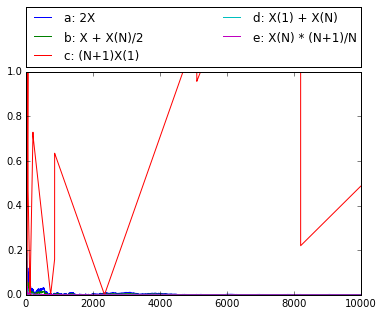

In [258]:
go(1, 1)

### оценка $(N+1) \cdot X_{1}$ - плохая, не будем её показывать

best evaluation: d


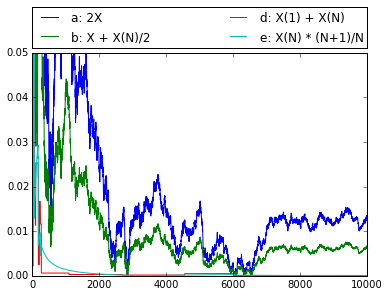

In [207]:
go(2,.05,\
   c = False)

### также не будем показывать $2X$ и $X+{X_{N}\over2}$

best evaluation: d


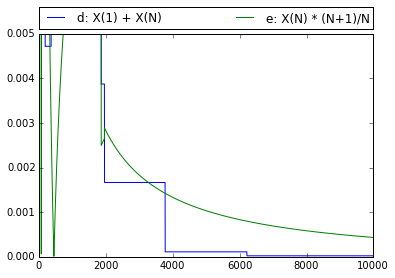

In [212]:
go(6, .005, a = False, b = False, c = False)

## Самая крутая оценка: $X_{1} + X_{N}$ 
